<a href="https://colab.research.google.com/github/aliceliu7/qosf-2020-tasks/blob/master/QOSF_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing packages: 
#pip install qiskit
#pip install pennylane
#!pip install pennylane pennylane-sf 

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
import qiskit.providers.aer.noise as noise
# noinspection PyPep8Naming
from random import uniform as randUniform
from math import pi
import matplotlib.pyplot as plt

import pennylane as qml
from pennylane import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
import qiskit.providers.aer.noise as noise
from qiskit.visualization import plot_histogram

In [ ]:
#Creating the device and target state> 
dev = qml.device("default.qubit", wires = 2, shots = 500, analytic = False)
@qml.qnode(dev)

#Quantum circuit with the parameters list containing angles for the rotation gates to be optimized 
def circuit(params):
    qml.RX(params[0], wires=1)
    qml.RY(params[1], wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=[0,1])

In [ ]:
#Cost function: 
def cost(x):
    p = circuit(x)
    return p[0]**2 + (0.5-p[1])**2 + (0.5-p[2])**2 + p[3]**2

In [ ]:
#Setting random initial parameter values to test the cost function
init_params = np.random.rand(2) 
print('Initial parameters are: ', init_params)
print('Cost value of initial parameters is: ', cost(init_params))

Initial parameters are:  [0.22943205 0.78320503]
Cost value of initial parameters is:  1.2046


In [ ]:
#Using the gradient descent optimizer to create a loop for evaluation of the cost function with the changing parameter values
opt = qml.GradientDescentOptimizer(stepsize=0.1)
    
steps = 500
    
params = init_params

for i in range(steps):
    params = opt.step(cost,params)
    
    if (i + 1) % 100 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step   100:  0.0068160
Cost after step   200:  0.0067760
Cost after step   300:  0.0015600
Cost after step   400:  0.0005840
Cost after step   500:  0.0011760
Optimized rotation angles: [2.93584925 1.56742303]


In [ ]:
#Quantum circuit with the optimized rotation angles 
circ=qiskit.QuantumCircuit(2,2)
circ.rx(params[0],1)
circ.ry(params[1], 0)
circ.cnot(0,1)
circ.barrier(range(2))
circ.measure(range(2),range(2))
circ.draw()

┌────────────┐      ░ ┌─┐   
q_0: ┤ RY(1.5674) ├──■───░─┤M├───
     ├────────────┤┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ RX(2.9358) ├┤ X ├─░──╫─┤M├
     └────────────┘└───┘ ░  ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
import qiskit.providers.aer.noise.errors.standard_errors

#error probabilities: 
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

#depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

#add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['rx', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

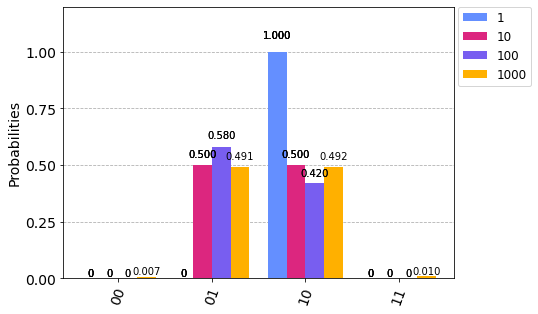

In [ ]:
#Defining the simulator and configuring it 
#The circuit is executed with 1, 10, 100 and 1000 shots

shots = [1,10,100,1000]
counts_list = []
for shot in shots:
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ,backend=backend,shots=shot)
    counts = job.result().get_counts()
    counts_list.append(counts)
plot_histogram(counts_list, legend =['1', '10', '100', '1000'])


1 measurement result:
{'10': 1}


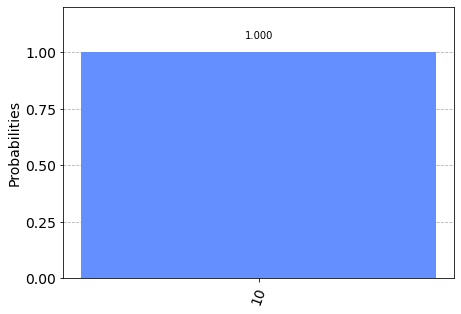

In [ ]:
backend_sim = qiskit.Aer.get_backend('qasm_simulator')
noise_model = qiskit.providers.aer.noise.NoiseModel()
backend_ops = {"method": "automatic"}

job_sim = qiskit.execute(circ, backend_sim, shots=1, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('1 measurement result:')
print(counts)
qiskit.visualization.plot_histogram(counts)

10 measurements result:
{'01': 2, '10': 8}


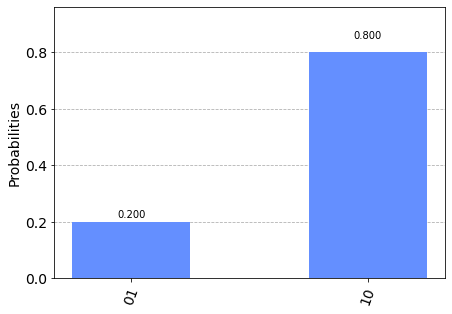

In [ ]:
job_sim = qiskit.execute(circ, backend_sim, shots=10, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('10 measurements result:')
print(counts)
qiskit.visualization.plot_histogram(counts)

100 measurements result:
{'01': 53, '10': 45, '11': 2}


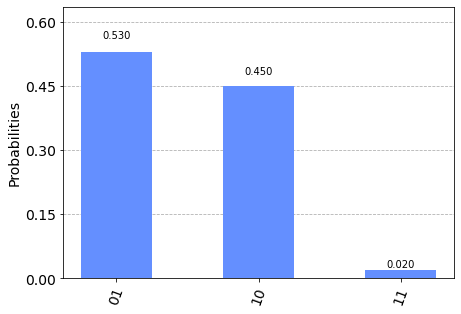

In [ ]:
job_sim = qiskit.execute(circ, backend_sim, shots=100, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('100 measurements result:')
print(counts)
qiskit.visualization.plot_histogram(counts)

1000 measurements result:
{'00': 7, '01': 510, '10': 481, '11': 2}


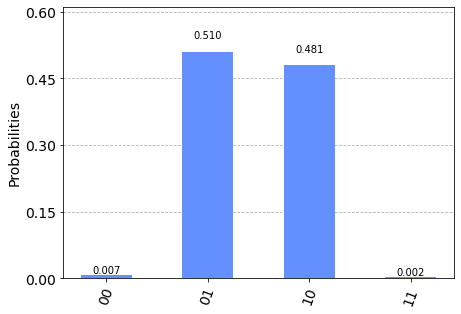

In [ ]:
job_sim = qiskit.execute(circ, backend_sim, shots=1000, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('1000 measurements result:')
print(counts)
qiskit.visualization.plot_histogram(counts)